# Actividad 4

## Estimación de orden y Condiciones de Neumann

#### Ejericicio 1 (estimación de orden):

La intención de este ejercicio es poder hacer estimacion de orden de convergencia en $\Delta t$ para resolver $$U_t=U_{xx}$$ $$U(0,t)=U(1,t)=0$$ $$U(x,0)=U_0(x)$$ donde $$U_0(x)=\left\{\begin{array}{rl}
     2|x-\frac{1}{6}|-\frac{1}{3} &  0<x<1/3\\
     0 & 1/3<x<2/3\\
     \frac{1}{2}-3|x-\frac{5}{6}| & 2/3<x<1
    \end{array}
    \right.$$

Para esto tomar lo implementado en la clase pasada (método $\theta$) y realizar las siguientes actividades a lo largo de la notebook. El objetivo será estimar el orden en $\Delta t$ para diferentes valores de $\theta$.


In [10]:
using LinearAlgebra, Plots

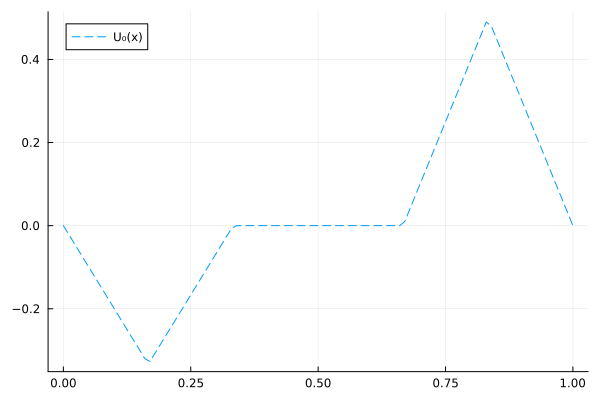

In [380]:
function U₀(x)
    if x<1/3
        return 2*abs(x-1/6)-1/3
    elseif x<2/3
        return 0
    else
        return 1/2-3*abs(x-5/6)
    end
end     

x=0:0.01:1
plot(x,U₀.(x),label="U₀(x)",ls=:dash)

Completar la función `solve` que toma como argumento el valor de $\theta$, $\Delta x$, $\Delta t$ y un tiempo final $T_f$. 

In [250]:
function solve(θ,Δx,Δt,T)
    steps =round(T/Δt)  #calculo los paso que voy a dar
    steps = Int(steps)
    x = 0:Δx:1
    J = length(x)
    #guardar el dato inicial

    #construir la matriz del metodo theta (sugerencia: notar que aparecen dos matrices relacionadas al implicito y explicito)
    for t=1:steps
        #realizar las iteraciones correspondientes
    end
    return u
end

solve (generic function with 2 methods)

Tomar $\theta=1$ (esto es hacer el método implicito), $\Delta x=0.01$, $\Delta t=0.1$, $T_f=1$ y graficar la solución obtenida junto a $U_0(x)$.

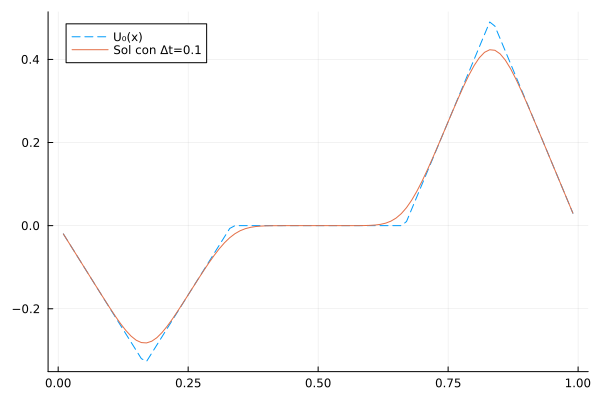

In [422]:
θ=0.5
Δx=0.01
Δt=0.1

#completar

Tomar los siguientes valores de $\Delta t$ y realizar en un mismo gráfico las soluciones obtenidas. $\Delta t=0.1,0.05,0.01,0.005,0.001$. ¿Qué puede observar?

*Obsevación: Si lo hacen en una Pluto notebook, pueden armar un deslizador para ir cambiando el $\Delta t$ y ver mas claramente el efecto.*

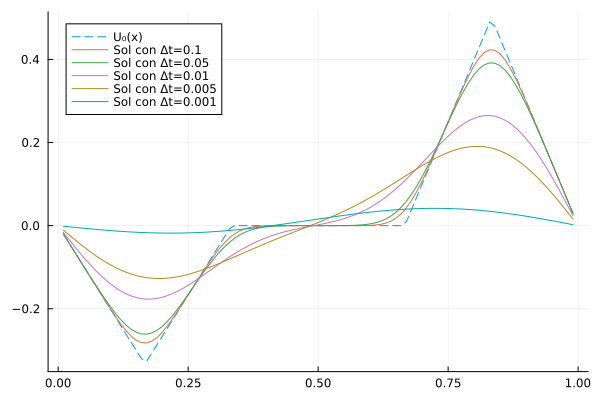

In [429]:
#completar

Dado que no conocemos la solución exacta, una forma de ver como se comporta el error (y así poder estudiar el orden) es crear una solución de referencia para un $\Delta t$ suficientemente chico que tomaremos como solución "exacta" ($U_{ref}$) y realizaremos los calculos del error para cada $\Delta t$ comparando con esta. Crear esta solución con un $\Delta t=0.00001$. 

In [431]:
u_ref=solve(θ,Δx,0.00001,1);

Crear un vector con los valores de $\Delta t$ mencionados anteoriormente y luego crear un vector que contenga el error en $\|\cdot\|_\infty$ entre cada solución y la $U_{ref}$. Luego realizar un plot en escala logaritmica entre ambos.

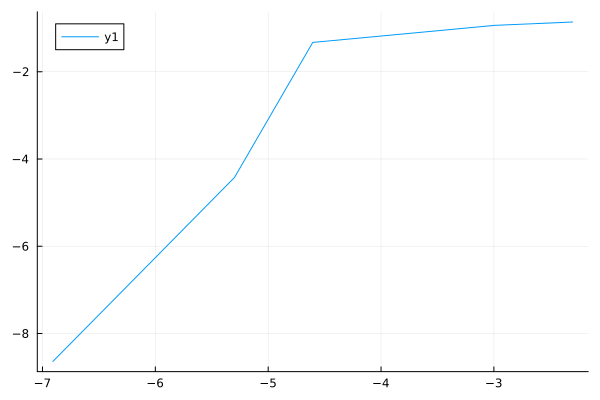

In [433]:
#completar

Repetir todo lo anterior, ahora con $\theta=1/2$ (Cranck-Nicolson). ¿Cómo podemos estimar el orden con la información que tenemos?¿Con que valor de $\theta$ obtenemos mejor orden?

---

#### Ejercicio 2 (Condiciones de Neumann)

Consideremos el siguiente problema $$U_t=a U_{xx},$$ con $$U_0(x) = 6\sin\left(\frac{\pi x}{2}\right), \qquad U_x(0,t) = 0, \qquad U_x(2,t)=0.$$

Tomemos $a=0.1$. 

Resolver este problema usando un método explicito y hacer un `heatmap`. Recordar que para esto es recomendable guardar las soluciones en una matriz donde cada fila corresponde a la solución a tiempo $t_n$.

Recordemos como es el esquema para implementar las condiciones de Neumann. Supongamos que $U_x(0,t)=h(t)$ y por simplicidad supongamos que $U(2,t)=0$. Para discretizar esta derivada usamos diferencias centradas, por lo tanto tenemos que $$h(t_n)=U_x(0,t)=\frac{u_{-1}^n-u_1^n}{2\Delta x}$$
Entonces, $u_{-1}^n=u_1^n-2\Delta x h(t_n)$, y por lo tanto $$u_0^{n+1}=\mu u_1^n+(1-2\mu)u_0^n+\mu u_{-1}^n = \mu u_1^n+(1-2\mu)u_0^n-\mu 2\Delta x h(t_n)$$
De esta forma, el sistema puede representarce de la siguiente manera, $$u^{n+1}=A u^n+ b,$$ donde
$$A=\begin{pmatrix}  1-2\mu & 2\mu & 0 & \dotsb & 0 & 0\\   
\mu & 1-2\mu & \mu & 0 & \dotsb &0 \\    
\vdots & & & & &\\   
& & & & \mu& 1-2\mu    
\end{pmatrix} \qquad
b=\begin{pmatrix}            
-\mu 2\Delta x h(t_n)\\
0\\
\vdots\\
0
\end{pmatrix}
$$

*Observación:* En estos casos el vector $u^{n+1}$ se cuenta desde el indice $j=0$.

In [449]:
#completar